In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras import optimizers

Using TensorFlow backend.


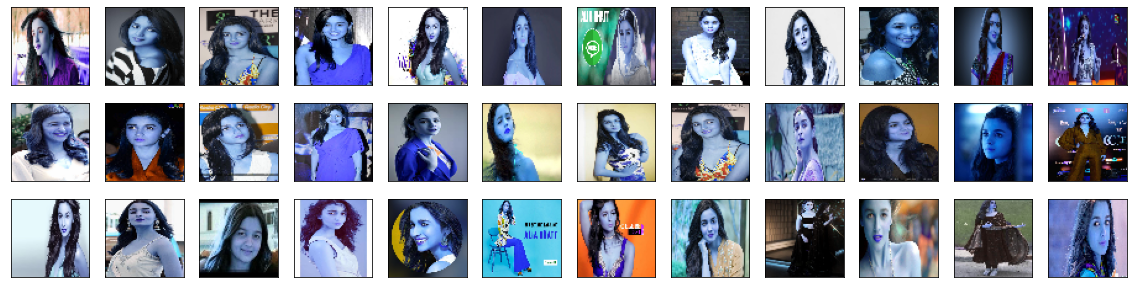

In [3]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(64,64))
            images.append(img1)
    return images
#Load the images 
deepika=load_images_from_folder(r'C:\Users\Dell\Desktop\Face Recognition\train\Deepika_Padukone')
alia=load_images_from_folder(r'C:\Users\Dell\Desktop\Face Recognition\train\Alia_Bhatt')
anushka=load_images_from_folder(r'C:\Users\Dell\Desktop\Face Recognition\train\Anushka_Sharma')
train_deepika = np.array(deepika)
train_alia = np.array(alia)
train_anushka= np.array(anushka)
#Visualize the images 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(alia[i]))

In [4]:
train_deepika_label=np.zeros(len(train_deepika))
train_alia_label=np.ones(len(train_alia))
train_anushka_label=np.full(len(train_anushka),2)

print(train_deepika.shape,train_deepika_label.shape)
print(train_alia.shape,train_alia_label.shape)
print(train_anushka.shape,train_anushka_label.shape)

(196, 64, 64, 3) (196,)
(166, 64, 64, 3) (166,)
(167, 64, 64, 3) (167,)


In [8]:
#Concatenate 
X=np.concatenate((train_deepika,train_alia,train_anushka))
y=np.concatenate((train_deepika_label,train_alia_label,train_anushka_label))
y_label =to_categorical(y)
#Train -Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.33, random_state=42,shuffle=True)
#Normalize the data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
print("Training Data",X_train.shape)
print("Testing Data",X_test.shape)


Training Data (354, 64, 64, 3)
Testing Data (175, 64, 64, 3)


In [9]:
#HyperParameters
batch_size = 64
epochs = 20
num_classes = 3
input_shape=(64,64,3)
#Model Define
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=input_shape,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [10]:
np.random.seed(42)
model_1=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64,shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 354 samples, validate on 175 samples
Epoch 1/20
354/354 [==============================] - 2s 5ms/step - loss: 1.2512 - accuracy: 0.3362 - val_loss: 1.1490 - val_accuracy: 0.4343
Epoch 2/20
354/354 [==============================] - 2s 4ms/step - loss: 1.0844 - accuracy: 0.4492 - val_loss: 1.0928 - val_accuracy: 0.3257
Epoch 3/20
354/354 [==============================] - 2s 4ms/step - loss: 1.0581 - accuracy: 0.4379 - val_loss: 1.0297 - val_accuracy: 0.4629
Epoch 4/20
354/354 [==============================] - 2s 4ms/step - loss: 0.9794 - accuracy: 0.5565 - val_loss: 1.0320 - val_accuracy: 0.4514
Epoch 5/20
354/354 [==============================] - 2s 5ms/step - loss: 0.9202 - accuracy: 0.5847 - val_loss: 1.3072 - val_accuracy: 0.4629
Epoch 6/20
354/354 [==============================] - 2s 4ms/step - loss: 0.9529 - accuracy: 0.5565 - val_loss: 1.0337 - val_accuracy: 0.5143
Epoch 7/20
354/354 [==============================] - 1s 4ms/step - loss: 0.9016 - accuracy: 0.5960 - 

In [13]:
from sklearn.metrics import confusion_matrix
y_test_pred=model.predict(X_test)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
cnf_matrix

array([[48, 10, 14],
       [13, 27,  9],
       [23, 12, 19]], dtype=int64)

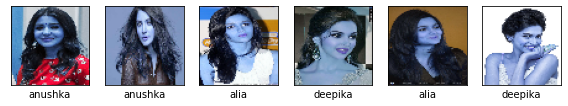

In [21]:
testdata= load_images_from_folder(r'C:\Users\Dell\Desktop\Face Recognition\test')
testimages=np.array(testdata)
predicted_classes = model.predict(testimages)
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
#Visualize the test data
fig = plt.figure(figsize=(20,5))
for i in range(6):
    ax = fig.add_subplot(3, 12, i+1,xticks=[], yticks=[])
    plt.imshow(testimages[i])
    if (predicted_classes1[i]==0):
        plt.xlabel('deepika')
    if (predicted_classes1[i]==1):
        plt.xlabel('alia')
    if (predicted_classes1[i]==2):
        plt.xlabel('anushka')    
plt.show()